<a href="https://colab.research.google.com/github/hiimnhan/scc451/blob/main/scc451.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import math
from scipy.stats import median_abs_deviation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

# Task 1: Basel Climate Dataset

In [42]:
basel_df = pd.read_csv('ClimateDataBasel.csv')

In [43]:
# info
basel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_min_c     1763 non-null   float64
 1   temp_max_c     1763 non-null   float64
 2   temp_mean_c    1763 non-null   float64
 3   rh_min_pct     1763 non-null   int64  
 4   rh_max_pct     1763 non-null   int64  
 5   rh_mean_pct    1763 non-null   float64
 6   slp_min_hpa    1763 non-null   float64
 7   slp_max_hpa    1763 non-null   float64
 8   slp_mean_hpa   1763 non-null   float64
 9   precip_mm      1763 non-null   float64
 10  snow_cm        1763 non-null   float64
 11  sunshine_min   1763 non-null   float64
 12  gust_min_kmh   1763 non-null   float64
 13  gust_max_kmh   1763 non-null   float64
 14  gust_mean_kmh  1763 non-null   float64
 15  wind_min_kmh   1763 non-null   float64
 16  wind_max_kmh   1763 non-null   float64
 17  wind_mean_kmh  1763 non-null   float64
dtypes: float

In [44]:
# describe
basel_df.describe()

,temp_min_c,temp_max_c,temp_mean_c,rh_min_pct,rh_max_pct,rh_mean_pct,slp_min_hpa,slp_max_hpa,slp_mean_hpa,precip_mm,snow_cm,sunshine_min,gust_min_kmh,gust_max_kmh,gust_mean_kmh,wind_min_kmh,wind_max_kmh,wind_mean_kmh
count,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000
mean,8.738776,16.779298,12.717350,54.092456,87.004538,71.040509,1014.690925,1020.364492,1017.576393,1.502893,0.068015,399.168240,7.235326,30.464208,17.567084,2.932845,14.858762,8.418839
std,7.803700,9.647769,8.788555,12.949827,7.892077,10.012178,8.848251,8.014133,8.282298,3.496710,0.513935,294.660868,8.221851,16.491422,11.504750,3.470768,7.871249,5.205606
min,-12.519471,-4.389471,-7.628222,19.000000,53.000000,38.333332,976.100000,981.400000,978.450000,0.000000,0.000000,0.000000,0.000000,4.320000,2.715000,0.000000,2.881557,1.495064
25%,1.700529,8.200529,4.689279,44.000000,82.000000,63.520834,1010.300000,1015.900000,1013.233400,0.000000,0.000000,123.972160,2.160000,19.080000,9.765000,0.842431,9.304952,4.872080
50%,10.210529,17.400530,14.618446,54.000000,88.000000,72.000000,1014.600000,1019.500000,1016.954040,0.000000,0.000000,387.746280,4.320000,26.280000,14.145000,1.864800,12.988194,6.939507
75%,15.530529,25.190529,20.432404,64.000000,93.000000,78.750000,1019.300000,1024.400000,1021.760405,1.200000,0.000000,619.156720,8.820000,37.440000,21.667500,3.729600,18.398964,10.108294
max,25.820530,36.700527,30.425112,93.000000,100.000000,95.250000,1043.600000,1049.900000,1047.095800,37.399994,13.860001,962.283300,57.960000,133.200000,90.749990,26.673279,59.192370,36.360706


In [45]:
# Handling missing data
columns = basel_df.columns

missing_summary = pd.DataFrame({
    "Missing Values": basel_df.isna().sum(),
    "Percentage": basel_df.isna().mean() * 100
}).sort_values(by="Missing Values")

missing_summary

,Missing Values,Percentage
temp_min_c,0,0.0
wind_min_kmh,0,0.0
gust_mean_kmh,0,0.0
gust_max_kmh,0,0.0
gust_min_kmh,0,0.0
sunshine_min,0,0.0
snow_cm,0,0.0
precip_mm,0,0.0
slp_mean_hpa,0,0.0
slp_max_hpa,0,0.0


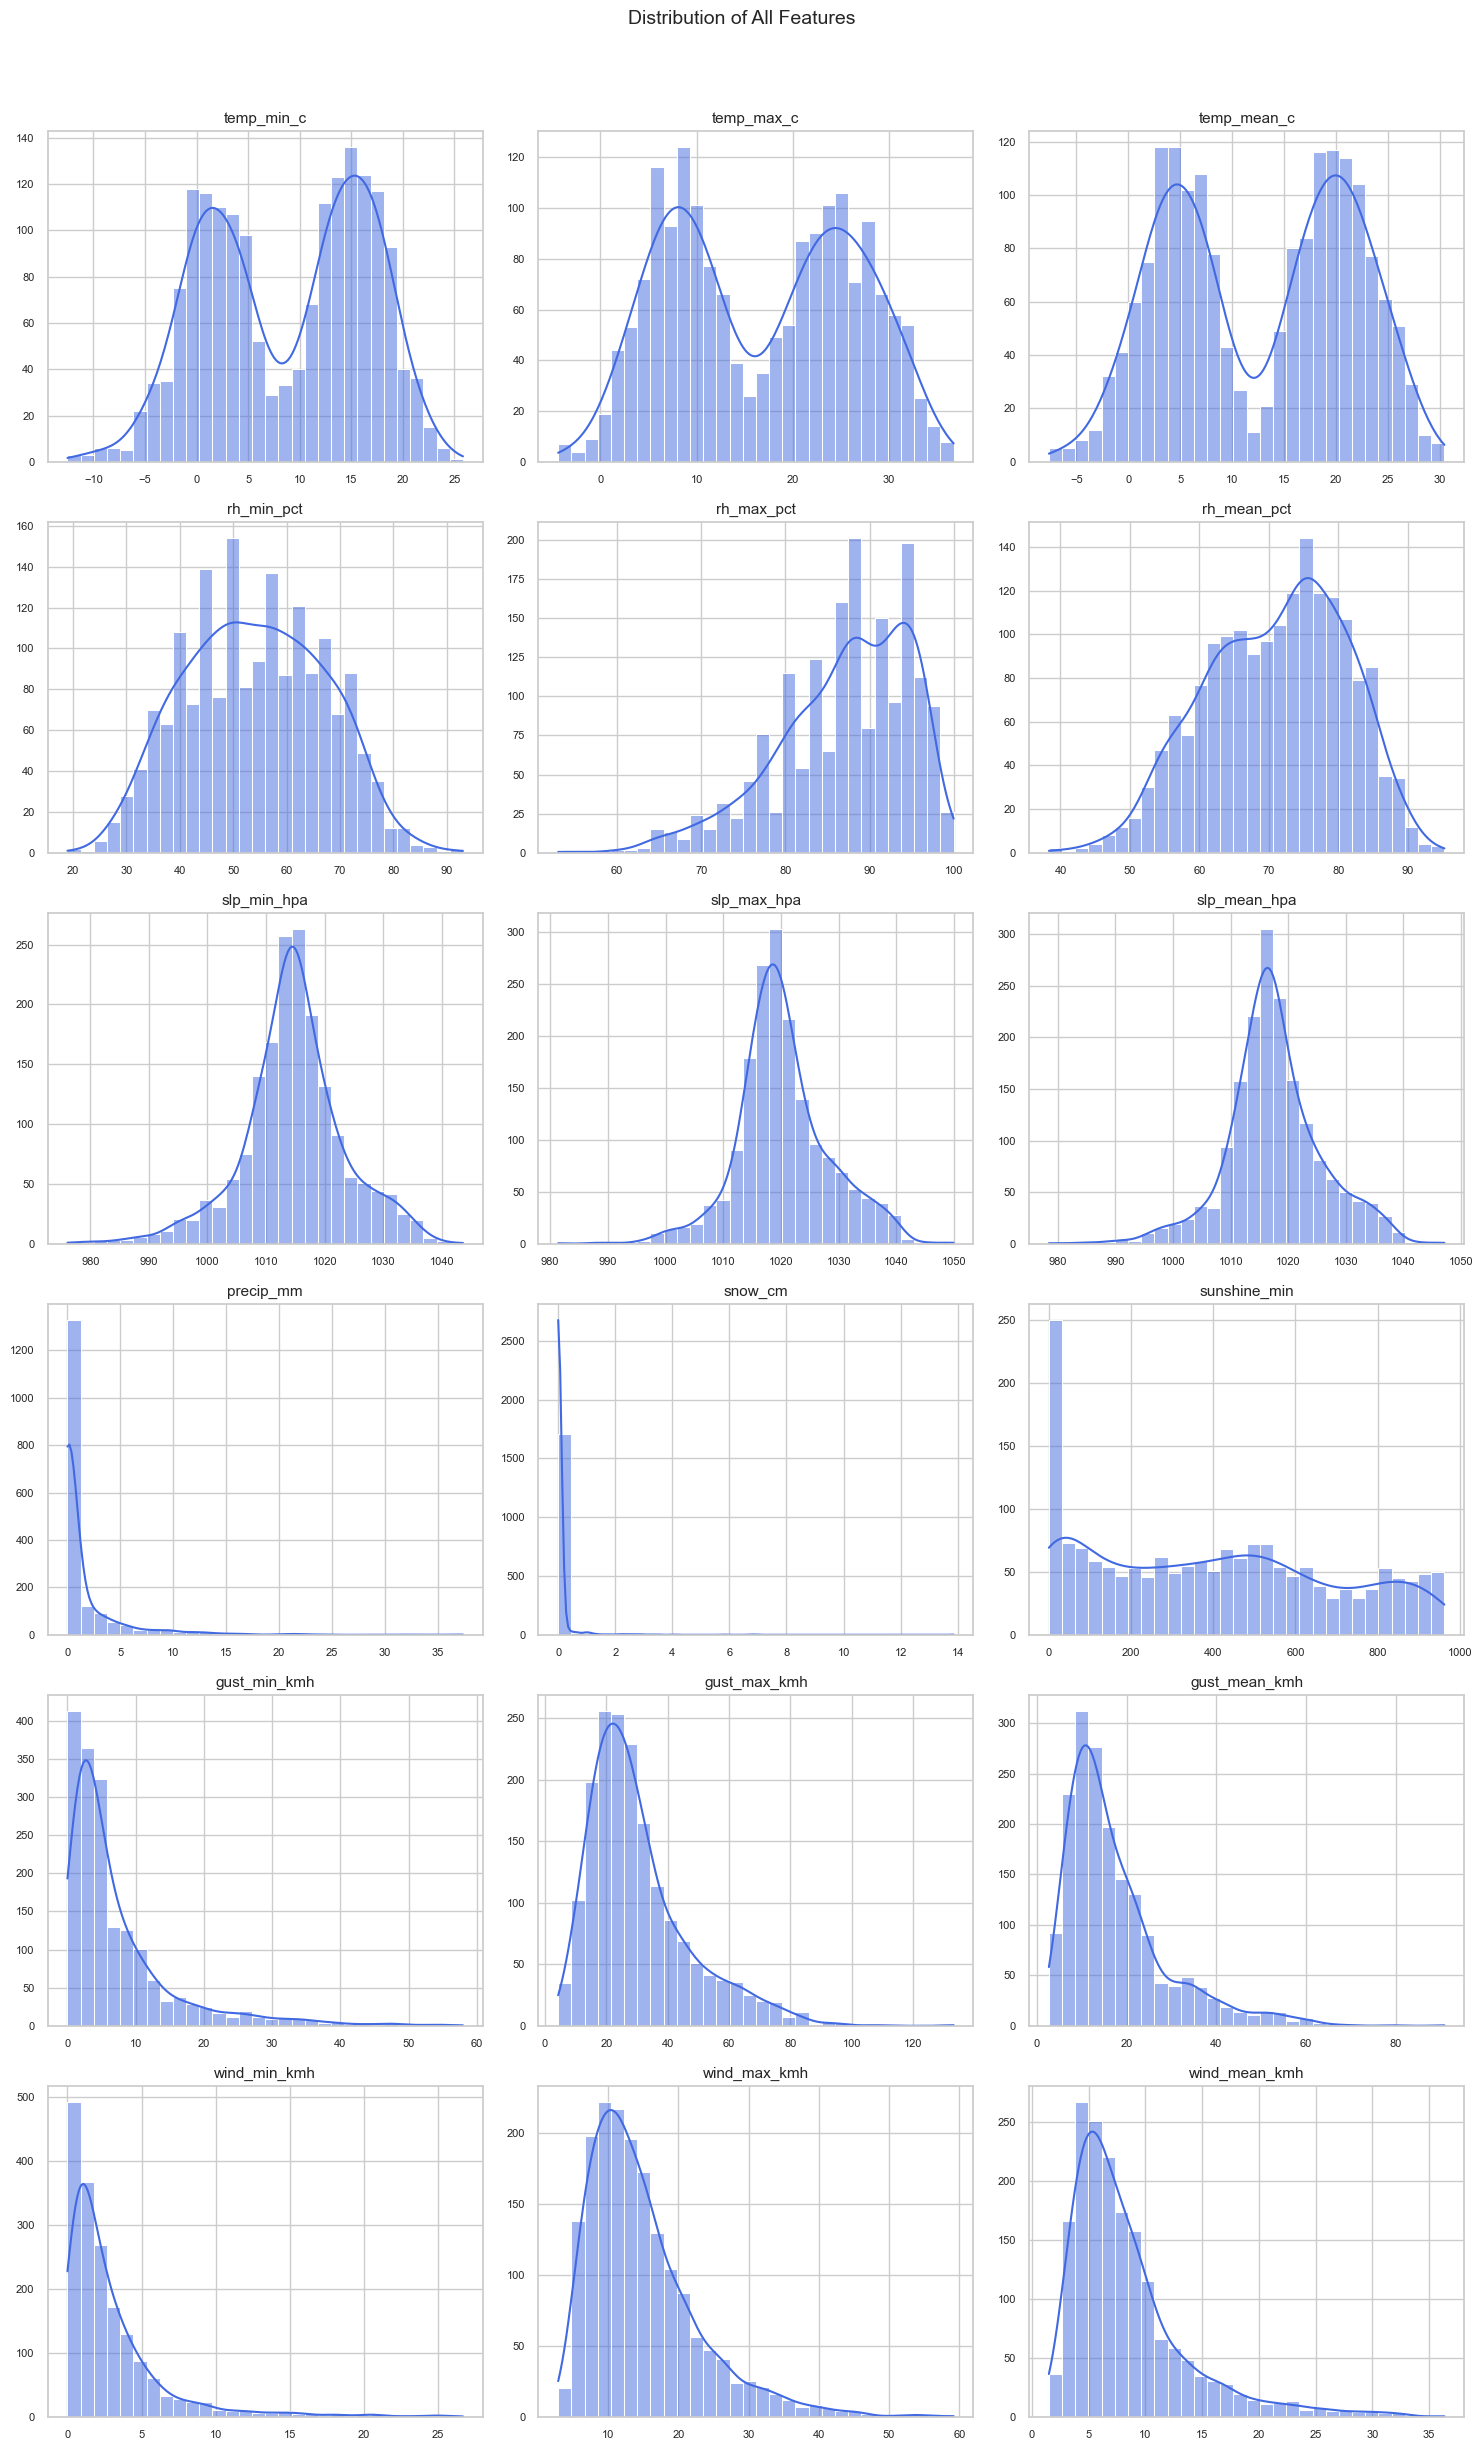

In [46]:
# select only numerical columns
num_cols = basel_df.select_dtypes(include=["number"]).columns

sns.set(style="whitegrid", context="notebook")
plt.rcParams.update({
    "figure.figsize": (5, 4),
    "axes.titlesize": 12,
    "axes.labelsize": 10,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.histplot(basel_df[col], bins=30, kde=True, ax=axes[i], color="royalblue", edgecolor="white")
  axes[i].set_title(col, fontsize=11)
  axes[i].set_xlabel("")
  axes[i].set_ylabel("")
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.suptitle("Distribution of All Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("dist_all_features.png")
plt.show()



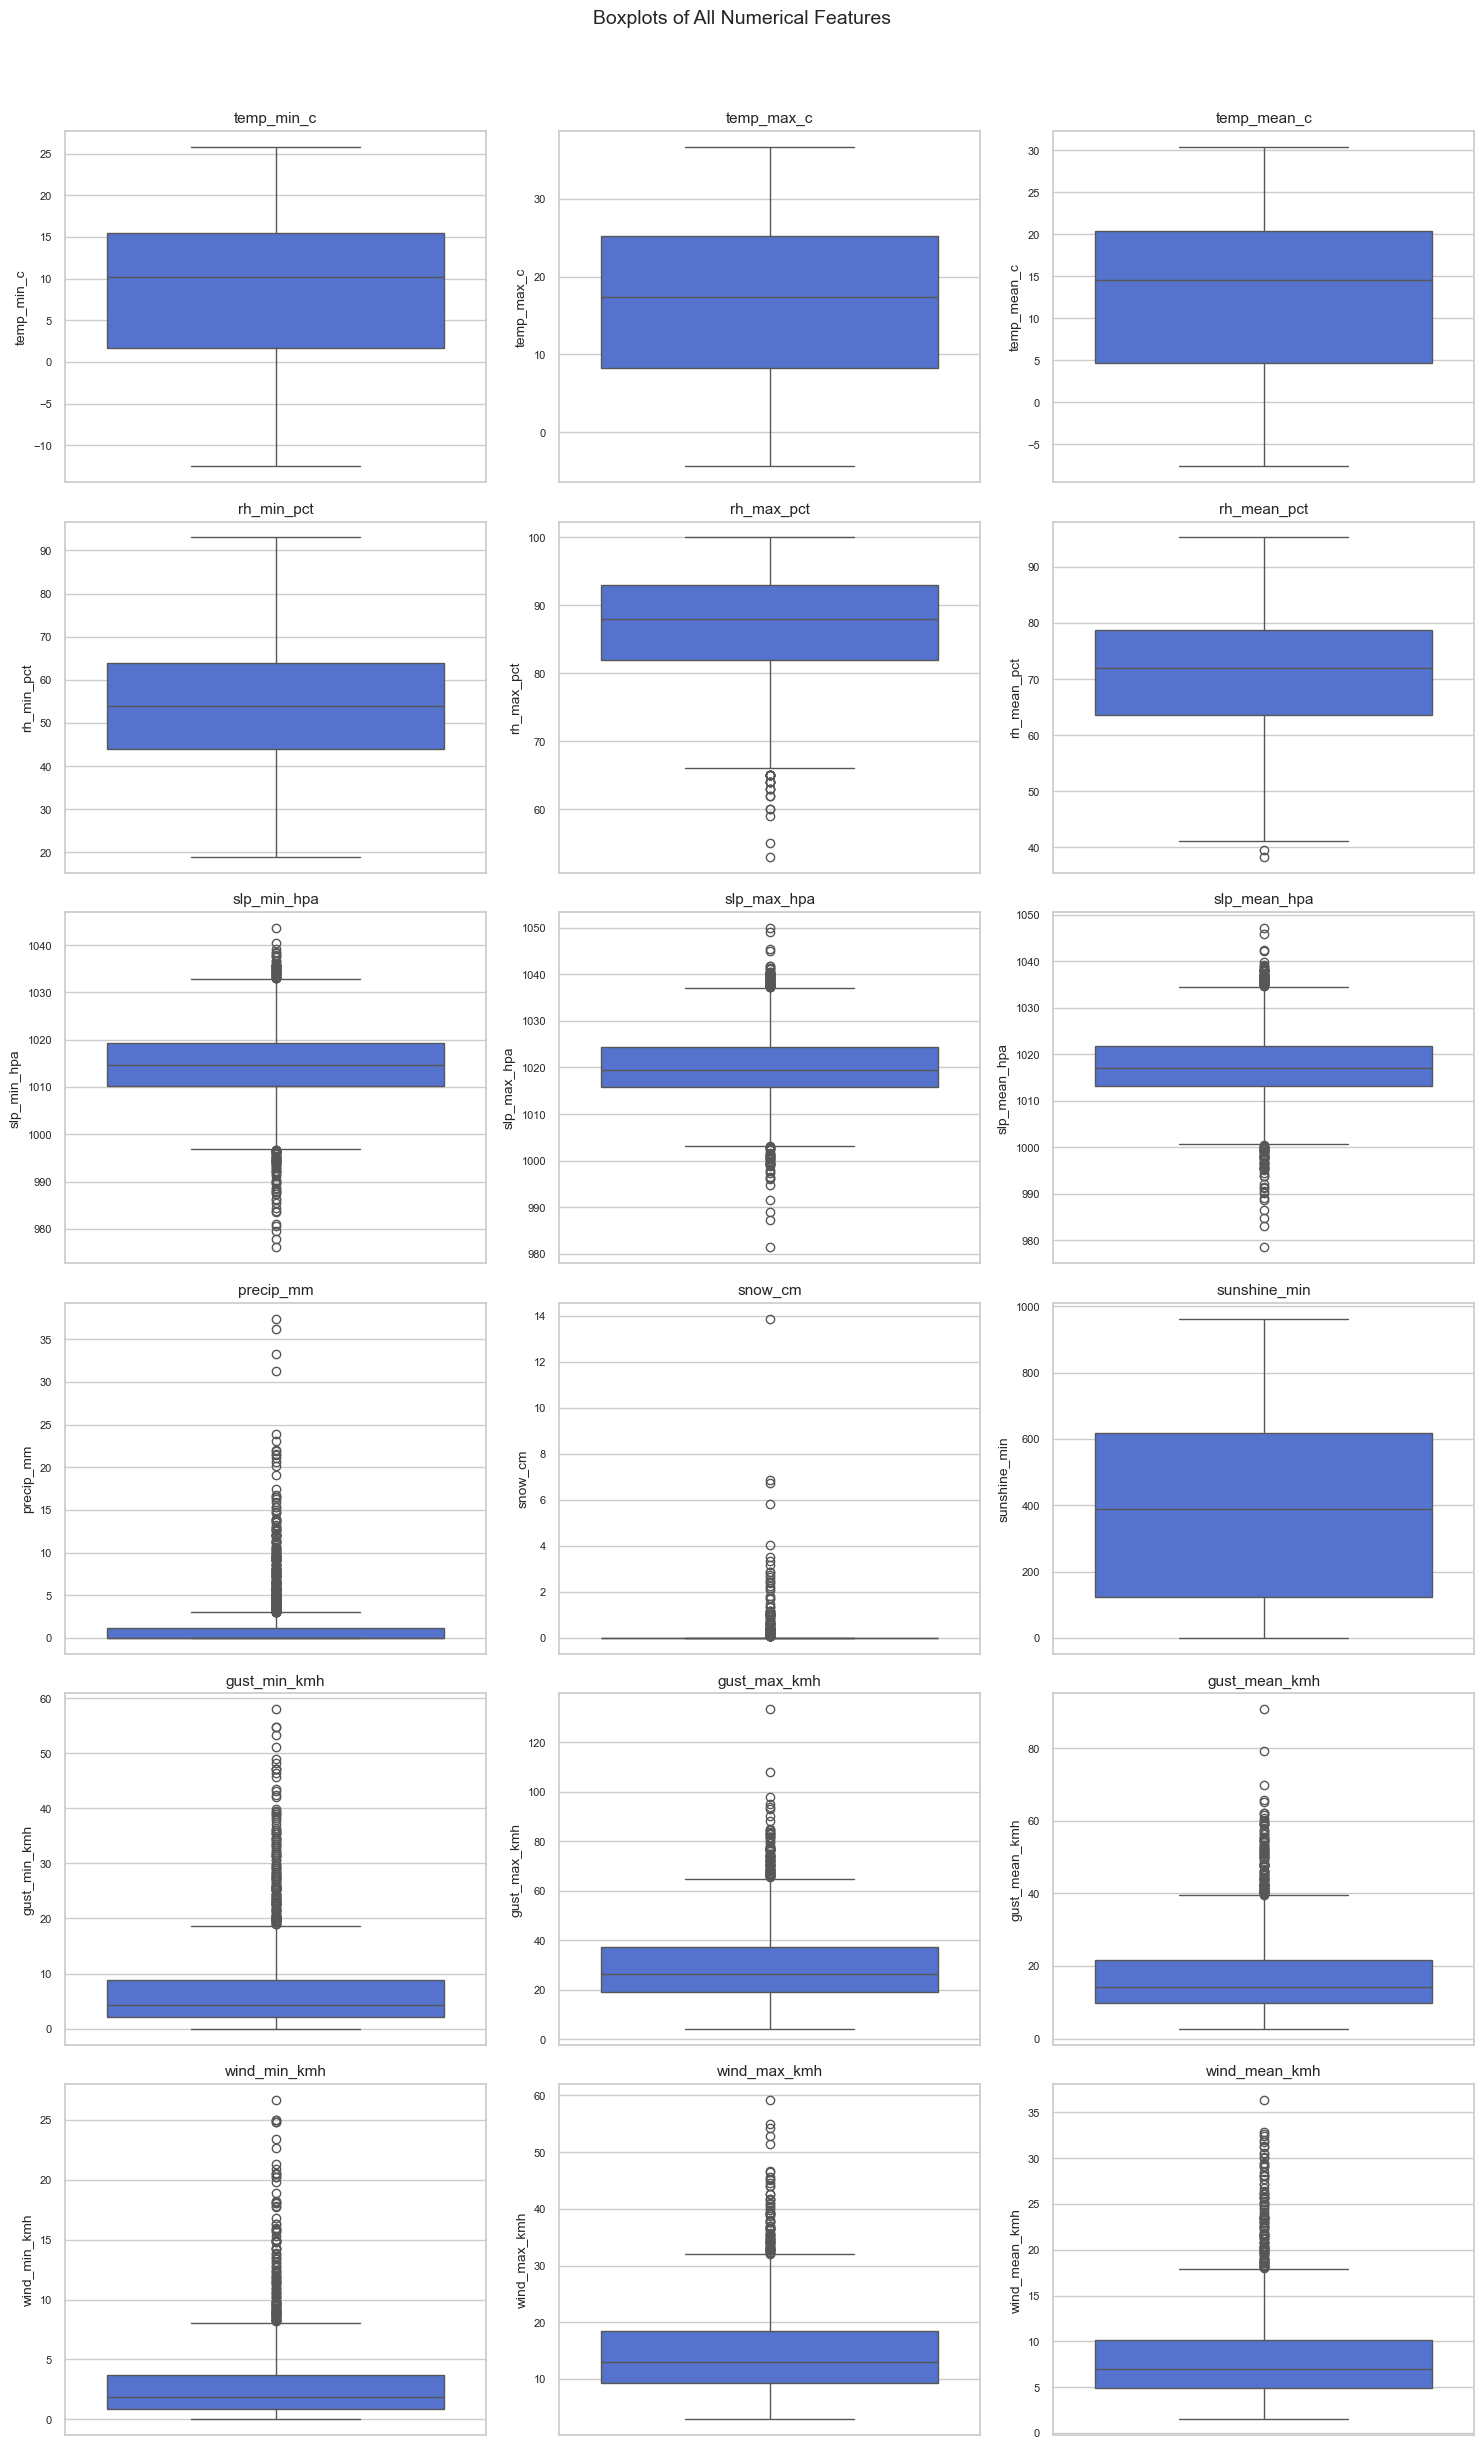

In [47]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.boxplot(y=basel_df[col], ax=axes[i], color="royalblue")
  axes[i].set_title(col, fontsize=11)
  axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.suptitle("Boxplots of All Numerical Features", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("boxplot_features.png")
plt.show()

In [48]:
scaler = RobustScaler()
basel_df_scaled = pd.DataFrame(
    scaler.fit_transform(basel_df[num_cols]),
    columns=num_cols,
    index=basel_df.index
)

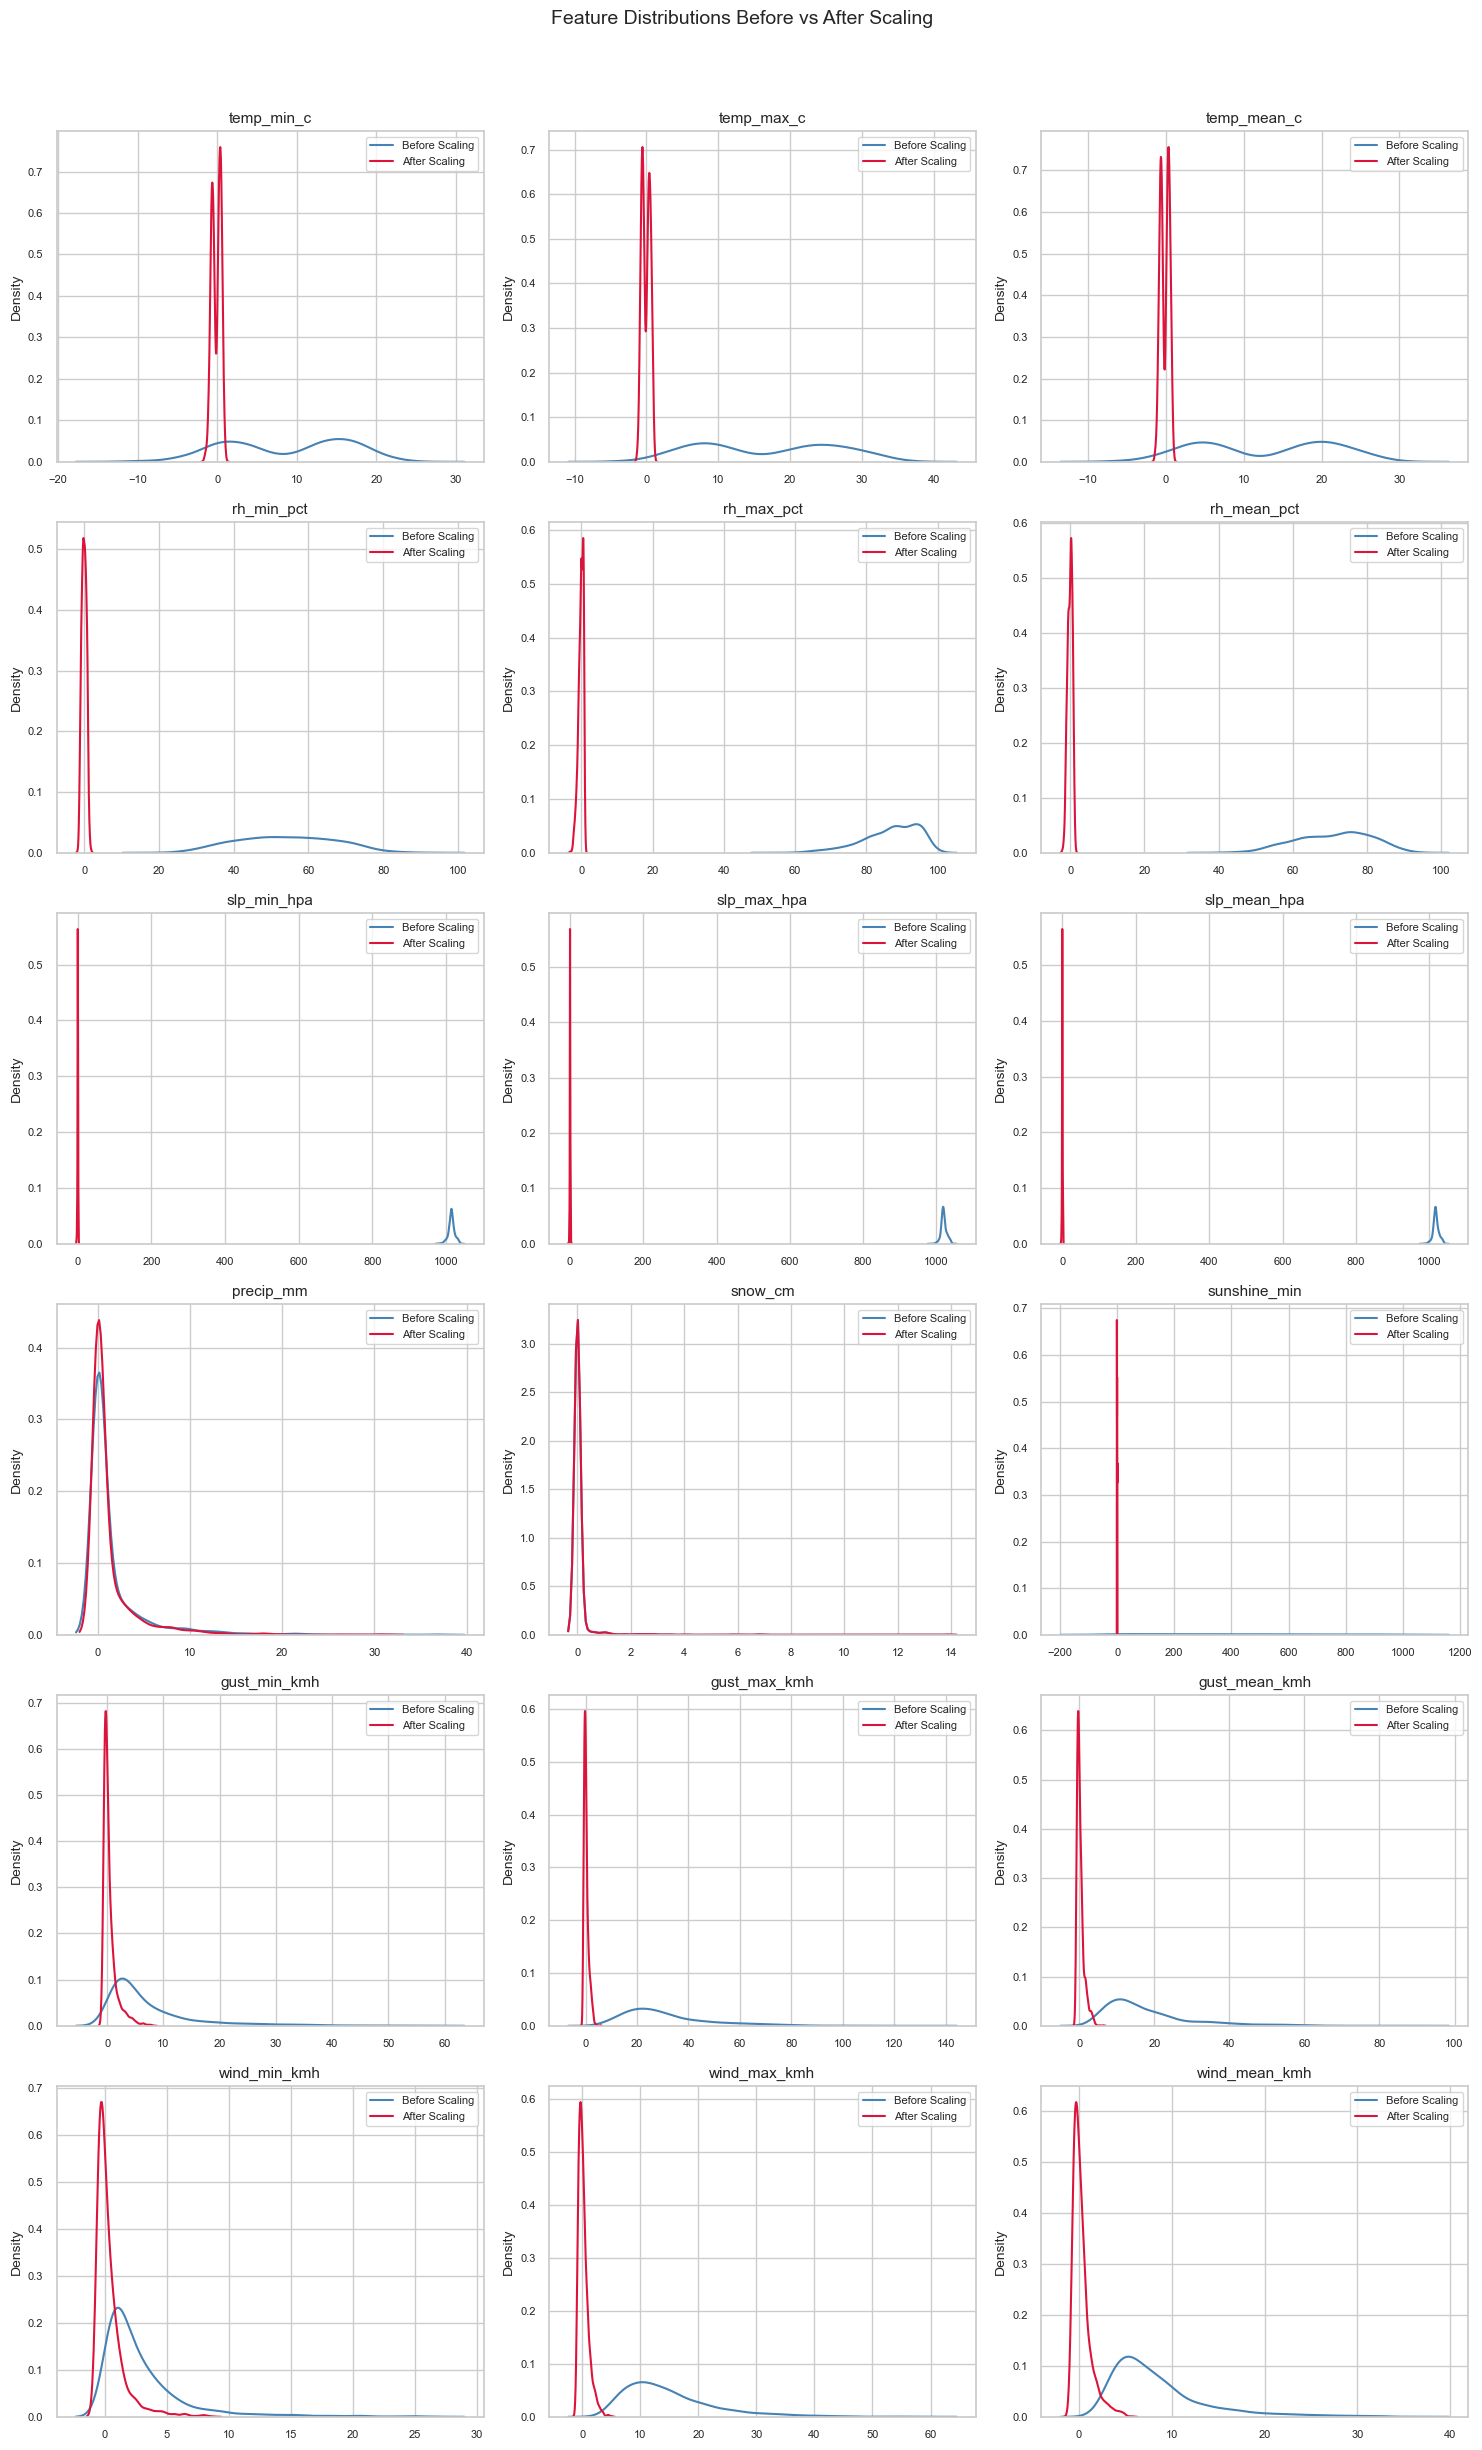

In [49]:
# compare distributions before and after scaling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(basel_df[col], ax=axes[i], label="Before Scaling", color="steelblue")
    sns.kdeplot(basel_df_scaled[col], ax=axes[i], label="After Scaling", color="crimson")
    axes[i].set_title(col, fontsize=11)
    axes[i].legend(fontsize=8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Density")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Feature Distributions Before vs After Scaling", fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig("feature_scaling.png")
plt.show()

In [50]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
labels = lof.fit_predict(basel_df_scaled)
scores = -lof.negative_outlier_factor_

basel_df_scaled['lof_label'] = labels
basel_df_scaled['lof_score'] = scores

n_outliers = (labels == -1).sum()
print(f"Detected {n_outliers} outliers ({n_outliers/len(basel_df_scaled)*100:.2f}%)")

Detected 13 outliers (0.74%)


In [51]:
# cap outliers
def cap_outliers(df, lower=0.01, upper=0.99):
    l, u = df.quantile([lower, upper])
    return np.clip(df, l, u)

outlier_mask = basel_df_scaled['lof_score'] == -1
df_treated = basel_df_scaled.copy()
for col in num_cols:
    df_treated.loc[outlier_mask, col] = cap_outliers(basel_df_scaled[col])[outlier_mask]

df_treated.drop(columns=['lof_label', 'lof_score'])

,temp_min_c,temp_max_c,temp_mean_c,rh_min_pct,rh_max_pct,rh_mean_pct,slp_min_hpa,slp_max_hpa,slp_mean_hpa,precip_mm,snow_cm,sunshine_min,gust_min_kmh,gust_max_kmh,gust_mean_kmh,wind_min_kmh,wind_max_kmh,wind_mean_kmh
0,-0.152567,0.010006,-0.074530,0.35,0.727273,0.385773,-0.166667,-0.129412,-0.140230,0.166667,0.0,-0.075090,-0.162162,-0.156863,-0.162571,-0.026924,-0.284246,-0.057211
1,0.065076,0.064155,0.023529,0.25,0.545455,0.292750,-0.077778,-0.341176,-0.230132,1.583333,0.0,-0.202979,0.324324,-0.058824,0.061752,0.795416,0.362558,0.320276
2,0.007954,0.045321,-0.022285,0.85,0.727273,0.760602,0.077778,-0.235294,-0.066447,0.083333,0.0,-0.528048,-0.162162,-0.117647,-0.115942,0.056818,-0.186756,-0.108301
3,0.017354,0.446145,0.170921,0.00,0.363636,0.369357,0.144444,-0.094118,0.036174,0.000000,0.0,0.996600,-0.324324,-0.333333,-0.391934,-0.369081,-0.165510,-0.429465
4,0.154736,0.483225,0.334326,-0.35,0.000000,-0.355677,0.122222,0.141176,0.144188,0.000000,0.0,1.138607,-0.540541,-0.568627,-0.720857,-0.515402,-0.719686,-0.692911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.292842,-0.429076,-0.438181,1.40,0.545455,1.017784,1.222222,1.788235,1.302727,4.166667,0.0,-0.783034,0.810811,0.352941,0.405797,0.665515,0.450261,0.490750
1759,-0.605929,-0.612125,-0.639300,-0.05,0.636364,0.238030,2.233333,2.447059,2.480878,0.000000,0.0,0.232435,-0.108108,-0.176471,0.239445,-0.184541,0.137851,0.334386
1760,-0.776573,-0.775162,-0.840896,-0.70,-0.454545,-0.571819,2.455556,2.388235,2.481335,0.000000,0.0,0.205660,0.216216,-0.078431,0.245747,-0.233247,-0.296692,-0.188020
1761,-0.706435,-0.567393,-0.717853,-0.65,-1.727273,-1.220246,1.955556,2.117647,2.079178,0.000000,0.0,0.253044,-0.324324,-0.039216,0.167612,-0.553622,-0.613756,-0.644382


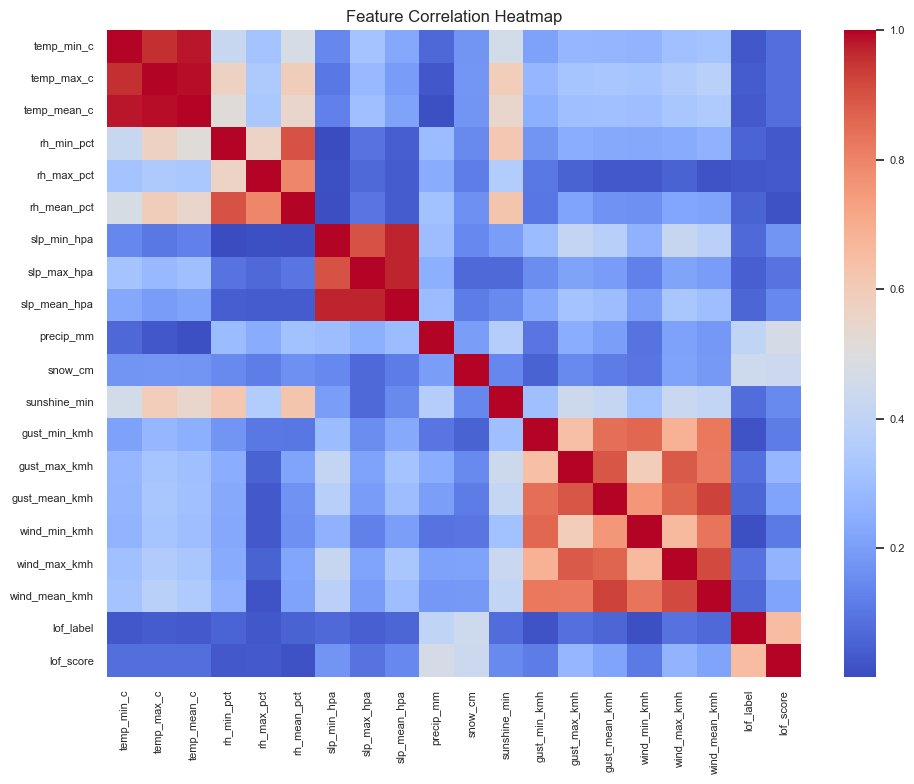

In [52]:
# Analyse feature correlation
corr = basel_df_scaled.corr().abs()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [53]:
# keep only upper triangle because correlation matrix is symmetric
# that every pair is shown twice, it might be a problem because it
# can lead to accidentially remove both features.
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr = [col for col in upper.columns if any(upper[col] >= 0.95)]
print("Highly correlated columns to drop:", high_corr)

df_reduced = basel_df_scaled.drop(columns=high_corr)

Highly correlated columns to drop: ['temp_max_c', 'temp_mean_c', 'slp_mean_hpa']


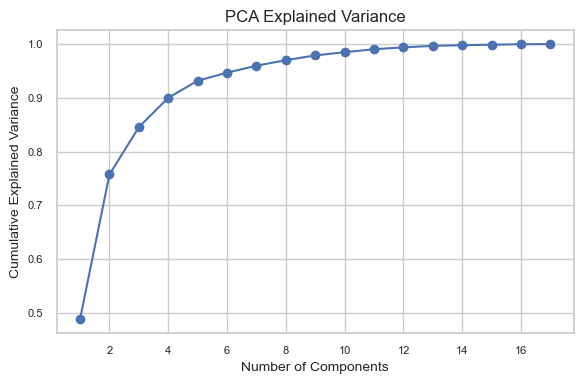

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(df_reduced)
explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.savefig('pca_explained.png')
plt.tight_layout()
plt.show()

In [55]:
N_COMPONENTS = 6
pca_final = PCA(n_components=N_COMPONENTS)
X_pca = pca_final.fit_transform(df_reduced)

pca_df = pd.DataFrame(X_pca, columns=[f"PC{x}" for x in range(1, N_COMPONENTS+1 )])
print("Explained variance ( PCs):", pca_final.explained_variance_ratio_.sum())
pca_df

Explained variance ( PCs): 0.9468800791723816


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.187674,-0.568784,0.062242,1.206798,0.437822,-0.074264
1,0.452831,-0.064508,0.037826,0.613611,0.611328,0.067168
2,-1.148690,-0.450640,0.408330,1.588173,0.576550,-0.272961
3,-1.698547,-1.090543,-0.188742,0.616465,0.232891,0.033992
4,-2.076676,-1.735436,-0.542830,-0.100752,0.277072,0.150866
...,...,...,...,...,...,...
1758,2.807791,-0.658395,2.900561,-0.048254,0.162035,-0.373085
1759,-1.859401,-0.568982,2.899580,-0.571710,-0.723878,0.072831
1760,-2.135633,-0.731795,2.349785,-1.802448,-0.856673,0.008753
1761,-2.390302,-1.292890,1.326485,-2.269176,-1.208967,0.043421


In [56]:
# Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def compute_scores(X, labels):
    labels = np.array(labels)
    if len(np.unique(labels)) < 2:
        return dict(silhouette=np.nan, db=np.nan, ch=np.nan)

    return dict(
        silhouette = silhouette_score(X, labels),
        db         = davies_bouldin_score(X, labels),
        ch         = calinski_harabasz_score(X, labels),
    )


# K-MEANS

,inertia,silhouette,db,ch
k,,,,
2,21240.815453,0.580255,0.904070,886.646312
3,15104.248679,0.465927,0.983628,980.609969
4,12913.235326,0.479884,0.915000,863.711125
5,11178.636089,0.276239,1.166904,816.072687
6,9715.250327,0.263928,1.106969,803.701425
7,8603.879985,0.276458,1.109666,793.635676
8,7963.237323,0.235119,1.156687,754.743041
9,7471.677269,0.240000,1.181261,717.926405
10,7005.269165,0.232052,1.157300,693.184850


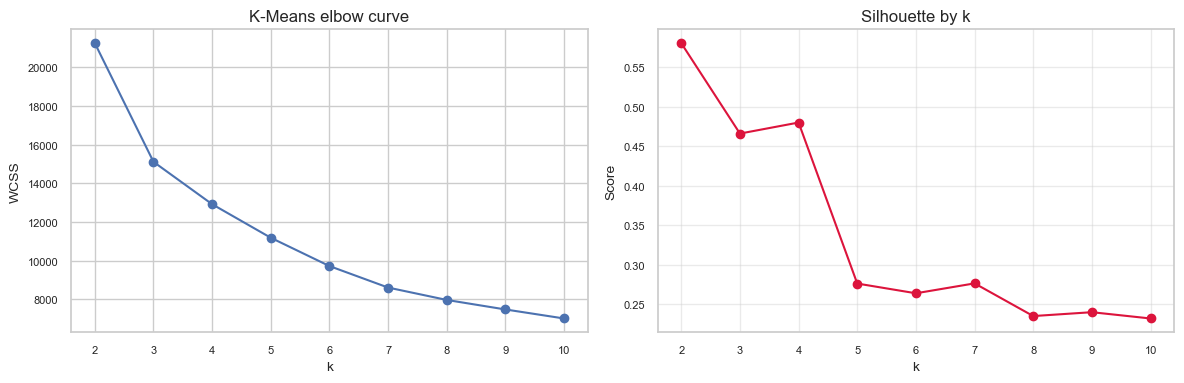

[K-Means] Best k = 2, silhouette = 0.580, Davies-Bouldin = 0.904, Calinski-Harabasz = 886.6


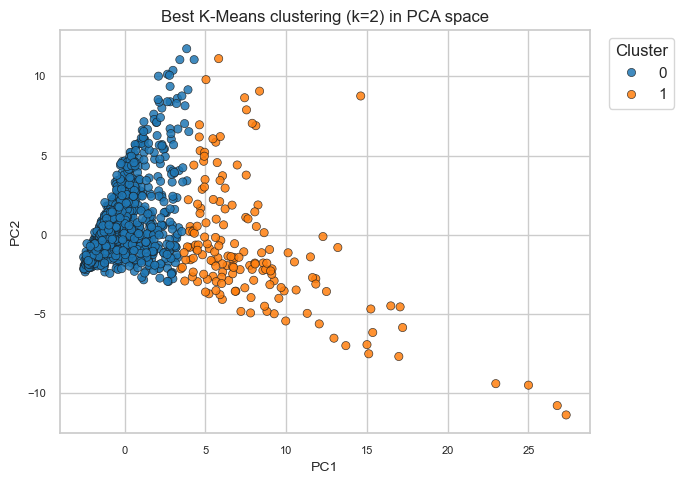

In [57]:
from sklearn.cluster import KMeans

k_range = range(2, 11)
kmeans_results = []
best_model = None
best_scores = None

for k in k_range:
    km = KMeans(n_clusters=k, n_init=30, random_state=0)
    labels = km.fit_predict(X_pca)
    scores = compute_scores(X_pca, labels)
    inertia = km.inertia_
    kmeans_results.append(dict(k=k, inertia=inertia, **scores))

    if np.isfinite(scores["silhouette"]) and (
        best_scores is None or scores["silhouette"] > best_scores["silhouette"]
    ):
        best_model = (km, labels)
        best_scores = scores

best_k = best_model[0].n_clusters
best_labels = best_model[1]

kmeans_df = pd.DataFrame(kmeans_results).set_index("k")
display(kmeans_df)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(kmeans_df.index, kmeans_df["inertia"], marker="o")
axes[0].set_title("K-Means elbow curve")
axes[0].set_xlabel("k")
axes[0].set_ylabel("WCSS")

axes[1].plot(kmeans_df.index, kmeans_df["silhouette"], marker="o", color="crimson")
axes[1].set_title("Silhouette by k")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Score")
axes[1].grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

print(
    f"[K-Means] Best k = {best_k}, "
    f"silhouette = {best_scores['silhouette']:.3f}, "
    f"Davies-Bouldin = {best_scores['db']:.3f}, "
    f"Calinski-Harabasz = {best_scores['ch']:.1f}"
)

pca_plot_df = pca_df.copy()
pca_plot_df['cluster'] = best_labels
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=pca_plot_df,
    x="PC1", y="PC2",
    hue="cluster",
    palette="tab10",
    s=35, alpha=0.85, edgecolor="k"
)
plt.title(f"Best K-Means clustering (k={best_k}) in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


# HDBSCAN

[HDBSCAN] clusters=2, noise points=1712
silhouette = 0.438 | Davies-Bouldin = 0.869 | Calinski-Harabasz = 57.3


/Users/nhanncv/miniforge3/envs/scc451/lib/python3.14/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/nhanncv/miniforge3/envs/scc451/lib/python3.14/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


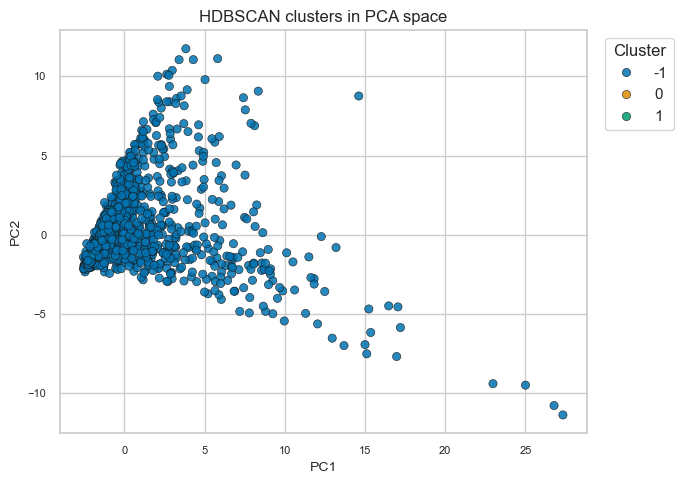

In [58]:
import hdbscan

hdb = hdbscan.HDBSCAN(
    min_cluster_size=20,
    min_samples=10,
    cluster_selection_method="leaf",
    metric="euclidean"
)
hdb_labels = hdb.fit_predict(X_pca)
noise_mask = hdb_labels == -1
n_noise = int(noise_mask.sum())
n_clusters = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
print(f"[HDBSCAN] clusters={n_clusters}, noise points={n_noise}")

if n_clusters >= 1 and (~noise_mask).sum() >= 2:
    hdb_scores = compute_scores(X_pca[~noise_mask], hdb_labels[~noise_mask])
else:
    hdb_scores = dict(silhouette=np.nan, db=np.nan, ch=np.nan)

print(
    f"silhouette = {hdb_scores['silhouette']:.3f} | "
    f"Davies-Bouldin = {hdb_scores['db']:.3f} | "
    f"Calinski-Harabasz = {hdb_scores['ch']:.1f}"
)


pca_plot_df = pca_df.copy()
pca_plot_df['cluster'] = hdb_labels
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=pca_plot_df,
    x='PC1', y='PC2',
    hue='cluster',
    palette='colorblind',
    s=35, alpha=0.85, edgecolor='k'
)
plt.title('HDBSCAN clusters in PCA space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()
